<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/JDU1Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 120 (delta 37), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (120/120), 14.45 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-01"
date2 = "2020-11-09"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#jdu")  
           
data1 = list(zip(text))
df = pd.DataFrame(data =data1, columns =["Tweet"])

df.to_csv('jdu1.csv') 

Please keep my October 5th, 2020 tweet to debate on #PostPoll actions of #BJP and #JDU https://t.co/QXGHcEMe2F
<--------------------------------------------------->
1
Not all good in collaboration. 
Nitish Kumar &amp; Yogi Aadityanath

#RJD #JDU #BiharElections2020 https://t.co/P6qUxQkgHq
<--------------------------------------------------->
2
RT @IndiaToday: The India Today-Axis My India Exit Poll predicted that Chirag Paswan's Lok Janshakti Party (#LJP) breaking out of the #NDA…
<--------------------------------------------------->
3
@AmitShah a sixer in #bihar #ljp #paswan #jdu #NitishKumar  #NDA. #Opp  is #fucked
<--------------------------------------------------->
4
@PTI_News #AIADMK  should remember #PDP,#Akalidal,and #JDU.Next is ur turn.
<--------------------------------------------------->
5
RT @firstpost: "We are confident that the results on 10 November will be different from the projections of #exitpolls. People of #Bihar ack…
<---------------------------------------------

# **Importing Libraries**


In [3]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **CLEANING JDU DATASET 1**

In [4]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

190



> **Removing duplicates tweets if any.**



In [5]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

153

In [6]:
df['Tweet'].duplicated().sum()

37

```
Number of duplicates tweets
```



In [7]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(153, 1)



```
Removed all the duplicate tweets
```





> **Removing emojis**



In [8]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)



```
From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet' 
```



In [9]:
count = 0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

30

In [10]:
df.shape

(123, 2)

In [11]:
df['Processed_Tweet']

0      Please keep my October 5th, 2020 tweet to deba...
1      Not all good in collaboration. \nNitish Kumar ...
3      @AmitShah a sixer in #bihar #ljp #paswan #jdu ...
4      @PTI_News #AIADMK  should remember #PDP,#Akali...
6      Will #SocialMedia management &amp; advance adv...
                             ...                        
147    JD-U supporters attend Bihar Chief Ministers e...
148    JD-U expels MLC for supporting daughter, who i...
149    #BiharElections : Never before have red, green...
151    @rssurjewala @INCIndia #NitishKumar didn't bri...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object



>**Removing username**



In [12]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      Please keep my October 5th, 2020 tweet to deba...
1      Not all good in collaboration. \nNitish Kumar ...
3        a sixer in #bihar #ljp #paswan #jdu #NitishK...
4        #AIADMK  should remember #PDP,#Akalidal,and ...
6      Will #SocialMedia management &amp; advance adv...
                             ...                        
147    JD-U supporters attend Bihar Chief Ministers e...
148    JD-U expels MLC for supporting daughter, who i...
149    #BiharElections : Never before have red, green...
151        #NitishKumar didn't bring development and ...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object



> **Removing URL, if any**



In [13]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      Please keep my October 5th, 2020 tweet to deba...
1      Not all good in collaboration. \nNitish Kumar ...
3        a sixer in #bihar #ljp #paswan #jdu #NitishK...
4        #AIADMK  should remember #PDP,#Akalidal,and ...
6      Will #SocialMedia management &amp; advance adv...
                             ...                        
147    JD-U supporters attend Bihar Chief Ministers e...
148    JD-U expels MLC for supporting daughter, who i...
149    #BiharElections : Never before have red, green...
151        #NitishKumar didn't bring development and ...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object



> **Removing Hashtags but keeping the word**



In [14]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      Please keep my October 5th, 2020 tweet to deba...
1      Not all good in collaboration. \nNitish Kumar ...
3        a sixer in bihar ljp paswan jdu NitishKumar ...
4        AIADMK  should remember PDP,#Akalidal,and JD...
6      Will SocialMedia management &amp; advance adve...
                             ...                        
147    JD-U supporters attend Bihar Chief Ministers e...
148    JD-U expels MLC for supporting daughter, who i...
149    BiharElections : Never before have red, green ...
151        NitishKumar didn't bring development and p...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object



> **Using Preprocessor library**



In [16]:
!pip install tweet-preprocessor

In [17]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Please keep my October th, tweet to debate on ...
1      Not all good in collaboration. Nitish Kumar &a...
3      a sixer in bihar ljp paswan jdu NitishKumar ND...
4      AIADMK should remember PDP,,and JDU.Next is ur...
6      Will SocialMedia management &amp; advance adve...
                             ...                        
147    JD-U supporters attend Bihar Chief Ministers e...
148    JD-U expels MLC for supporting daughter, who i...
149    BiharElections : Never before have red, green ...
151    NitishKumar didn't bring development and prosp...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object

> **Removing any special characters, numbers, punctuations,etc..**

In [18]:
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Please keep my October th  tweet to debate on ...
1      Not all good in collaboration  Nitish Kumar  a...
3      a sixer in bihar ljp paswan jdu NitishKumar ND...
4      AIADMK should remember PDP  and JDU Next is ur...
6      Will SocialMedia management  amp  advance adve...
                             ...                        
147    JD U supporters attend Bihar Chief Ministers e...
148    JD U expels MLC for supporting daughter  who i...
149    BiharElections   Never before have red  green ...
151    NitishKumar didn t bring development and prosp...
152    Maybe Bihar elect one FOE inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object

> **Converting to lowercase**

In [19]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      please keep my october th  tweet to debate on ...
1      not all good in collaboration  nitish kumar  a...
3      a sixer in bihar ljp paswan jdu nitishkumar nd...
4      aiadmk should remember pdp  and jdu next is ur...
6      will socialmedia management  amp  advance adve...
                             ...                        
147    jd u supporters attend bihar chief ministers e...
148    jd u expels mlc for supporting daughter  who i...
149    biharelections   never before have red  green ...
151    nitishkumar didn t bring development and prosp...
152    maybe bihar elect one foe inorder to take down...
Name: Processed_Tweet, Length: 123, dtype: object



```
We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that
```



In [20]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()



> **Removing Stop Words**



In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['own', "wasn't", 'because', 'the', "haven't", 'at', 'about', 'through', 'herself', 'does', 'whom', 'under', 'to', 'me', 'not', "weren't", 'when', 'don', 'my', 'yours', 'are', 'himself', 's', 'such', 'if', 'having', 'above', 'than', 'wasn', 'while', 'out', 've', 'you', 'i', 'which', 'with', 'will', 'over', 'more', 'hasn', 'no', 'their', 'up', 'all', 'some', 'but', 'o', "shouldn't", 'needn', 'after', 'mustn', "that'll", 'that', "don't", 'her', 'this', 'them', 'from', 'doesn', 'ain', 'just', 'those', 'ourselves', 'being', "mightn't", 'him', 'll', 'again', 'as', 'yourself', 'our', 'or', 'for', 'has', 'few', 'be', "wouldn't", 'nor', 'm', 'shouldn', 'below', 'theirs', 'should', "couldn't", 'same', 're', 't', "hasn't", "mustn't", 'it', 'themselves', 'did', 'down', 'most', 'of', "shan't", 'have', 'had', 'was', 'doing', 'so', 'his', 'is', 'in', 'until', 'an', 'each', "aren't", "needn't", 'they', 'weren', 'can', 'do', "it's", 'were', 'ours', "should've", "doesn't", "you'll", 'during', 'what', '

In [23]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      please keep october th tweet debate postpoll a...
1      good collaboration nitish kumar amp yogi aadit...
3      sixer bihar ljp paswan jdu nitishkumar nda opp...
4                   aiadmk remember pdp jdu next ur turn
6      socialmedia management amp advance advertiseme...
                             ...                        
147    jd u supporters attend bihar chief ministers e...
148    jd u expels mlc supporting daughter ljp candid...
149    biharelections never red green tricolour flags...
151    nitishkumar bring development prosperity bihar...
152    maybe bihar elect one foe inorder take another...
Name: Processed_Tweet, Length: 123, dtype: object



> **Tokenizing**



In [24]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [please, keep, october, th, tweet, debate, pos...
1      [good, collaboration, nitish, kumar, amp, yogi...
3      [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
4           [aiadmk, remember, pdp, jdu, next, ur, turn]
6      [socialmedia, management, amp, advance, advert...
                             ...                        
147    [jd, u, supporters, attend, bihar, chief, mini...
148    [jd, u, expels, mlc, supporting, daughter, ljp...
149    [biharelections, never, red, green, tricolour,...
151    [nitishkumar, bring, development, prosperity, ...
152    [maybe, bihar, elect, one, foe, inorder, take,...
Name: Processed_Tweet, Length: 123, dtype: object



> **Stemming**



In [25]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [pleas, keep, octob, th, tweet, debat, postpol...
1      [good, collabor, nitish, kumar, amp, yogi, aad...
3      [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
4             [aiadmk, rememb, pdp, jdu, next, ur, turn]
6      [socialmedia, manag, amp, advanc, advertis, st...
                             ...                        
147    [jd, u, support, attend, bihar, chief, minist,...
148    [jd, u, expel, mlc, support, daughter, ljp, ca...
149    [biharelect, never, red, green, tricolour, fla...
151    [nitishkumar, bring, develop, prosper, bihar, ...
152    [mayb, bihar, elect, one, foe, inord, take, an...
Name: Processed_Tweet, Length: 123, dtype: object

In [26]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Tweet,Processed_Tweet
0,"Please keep my October 5th, 2020 tweet to deba...","[pleas, keep, octob, tweet, debat, postpol, ac..."
1,Not all good in collaboration. \nNitish Kumar ...,"[good, collabor, nitish, kumar, amp, yogi, aad..."
3,@AmitShah a sixer in #bihar #ljp #paswan #jdu ...,"[sixer, bihar, ljp, paswan, jdu, nitishkumar, ..."
4,"@PTI_News #AIADMK should remember #PDP,#Akali...","[aiadmk, rememb, pdp, jdu, next, turn]"
6,Will #SocialMedia management &amp; advance adv...,"[socialmedia, manag, amp, advanc, advertis, st..."
...,...,...
147,JD-U supporters attend Bihar Chief Ministers e...,"[support, attend, bihar, chief, minist, elect,..."
148,"JD-U expels MLC for supporting daughter, who i...","[expel, mlc, support, daughter, ljp, candid, j..."
149,"#BiharElections : Never before have red, green...","[biharelect, never, red, green, tricolour, fla..."
151,@rssurjewala @INCIndia #NitishKumar didn't bri...,"[nitishkumar, bring, develop, prosper, bihar, ..."


In [27]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

1235

In [29]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

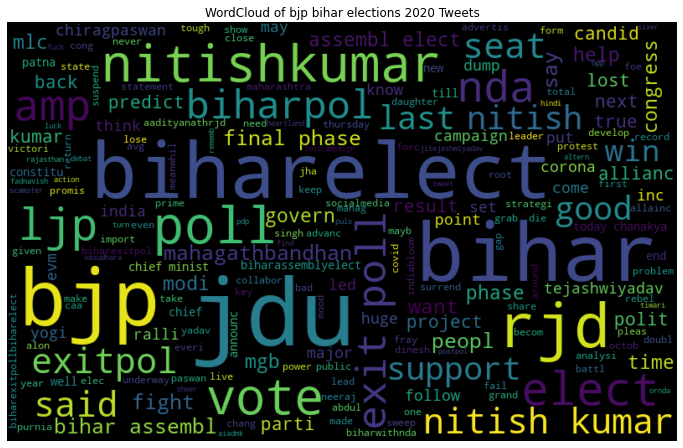

In [30]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of bjp bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**

In [31]:
from textblob import TextBlob

In [32]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

123

In [33]:
df['Processed_Tweet']

0      [pleas, keep, octob, tweet, debat, postpol, ac...
1      [good, collabor, nitish, kumar, amp, yogi, aad...
3      [sixer, bihar, ljp, paswan, jdu, nitishkumar, ...
4                 [aiadmk, rememb, pdp, jdu, next, turn]
6      [socialmedia, manag, amp, advanc, advertis, st...
                             ...                        
147    [support, attend, bihar, chief, minist, elect,...
148    [expel, mlc, support, daughter, ljp, candid, j...
149    [biharelect, never, red, green, tricolour, fla...
151    [nitishkumar, bring, develop, prosper, bihar, ...
152    [mayb, bihar, elect, one, foe, inord, take, an...
Name: Processed_Tweet, Length: 123, dtype: object

In [34]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 45
Negative Tweets: 12
Neutral Tweets 66




```
Classifying Tweets As Positive,Negetive and Neutral
```



In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.734,0.266,0.4404
2,0.304,0.696,0.000,-0.5423
3,0.000,1.000,0.000,0.0000
4,0.000,0.787,0.213,0.4019
...,...,...,...,...
118,0.000,0.722,0.278,0.4019
119,0.230,0.556,0.214,-0.0516
120,0.000,1.000,0.000,0.0000
121,0.000,1.000,0.000,0.0000


In [37]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.734,0.266,0.4404,Positive
2,0.304,0.696,0.000,-0.5423,Negative
3,0.000,1.000,0.000,0.0000,Neutral
4,0.000,0.787,0.213,0.4019,Positive


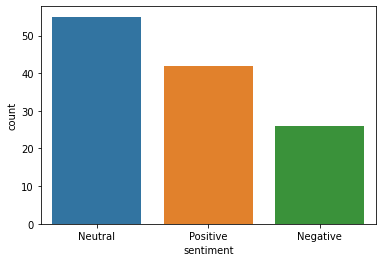

In [38]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)